In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/disease-prediction-using-machine-learning/Training.csv
/kaggle/input/disease-prediction-using-machine-learning/Testing.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

%matplotlib inline

In [3]:
data=pd.read_csv('/kaggle/input/disease-prediction-using-machine-learning/Training.csv')
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [4]:
data=data.dropna(axis=1)

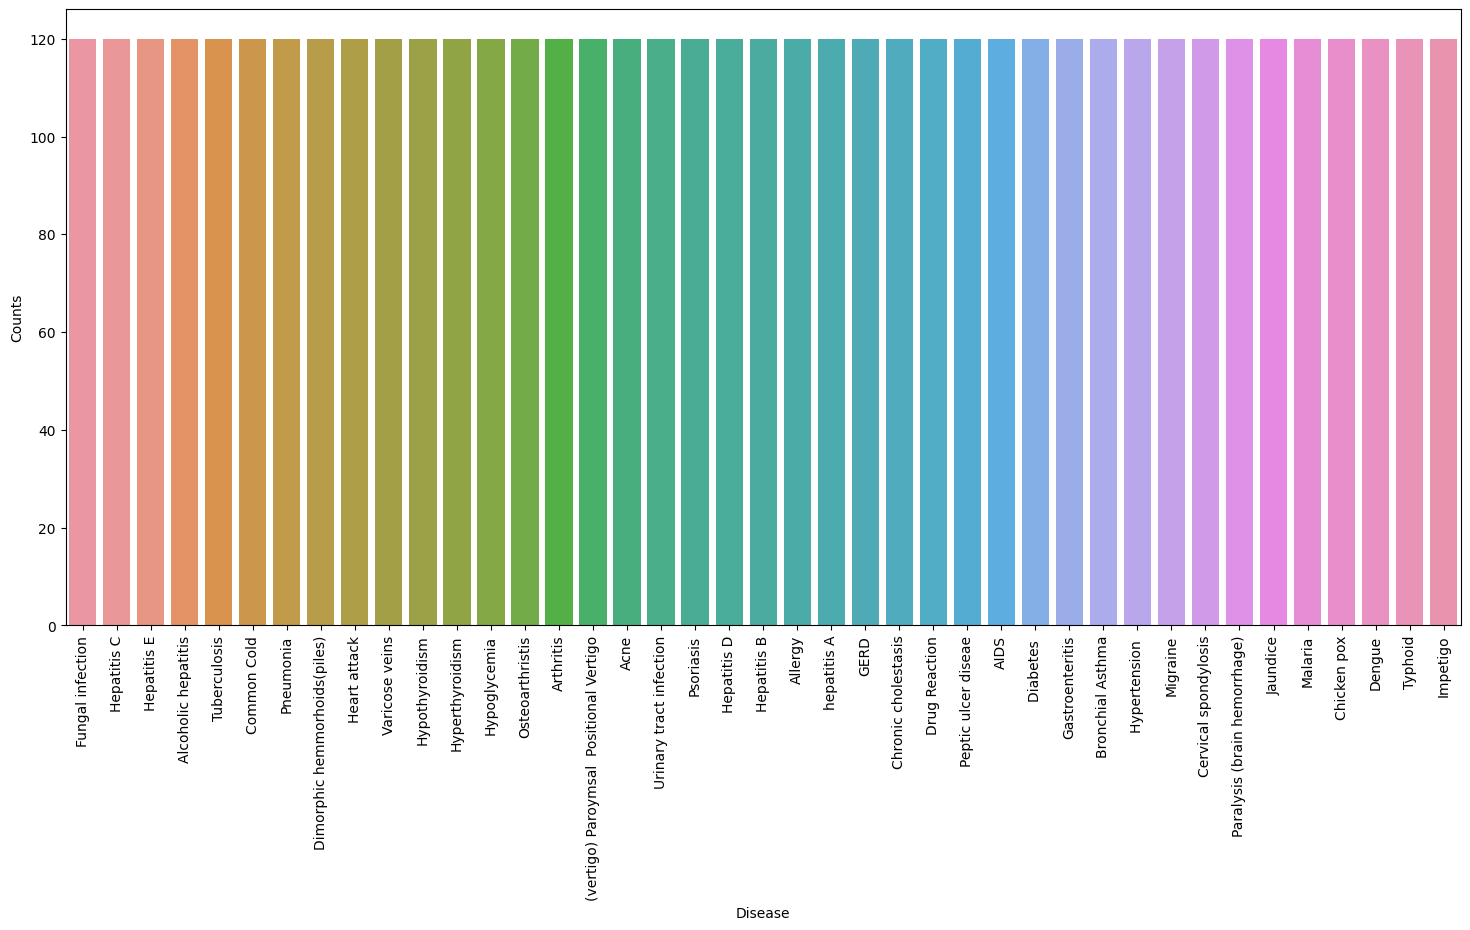

In [5]:
#Checking whether the dataset is balanced or not

disease_counts= data["prognosis"].value_counts()
temp_df= pd.DataFrame({
    "Disease":disease_counts.index,
    "Counts": disease_counts.values
})

plt.figure(figsize=(18, 8))
sns.barplot(x="Disease", y="Counts", data=temp_df)
plt.xticks(rotation=90)
plt.show()

In [6]:
encoder=LabelEncoder()
data["prognosis"]=encoder.fit_transform(data["prognosis"])

In [7]:
#Splitting the dataset into Training and Testing.

x= data.iloc[:,:-1]
y=data.iloc[:,-1]
x_train, x_test, y_train, y_test= train_test_split(
x, y, test_size= 0.2, random_state=24)

print(f"Train: {x_train.shape}, {y_train.shape}")
print(f"Test: {x_test.shape}, {y_test.shape}")

Train: (3936, 132), (3936,)
Test: (984, 132), (984,)


In [8]:
#Defining scoring metric for K-fold cross validation

def cv_scoring(estimator, x, y):
    return accuracy_score(y, estimator.predict(x))

#Initializing Models

models= {
    "SVC":SVC(),
    "Gaussian NB": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state= 18)
}

#Producing cross validation score for the models

for model_name in models:
    model= models[model_name]
    scores= cross_val_score(model, x, y, cv=10,
                           n_jobs= -1,
                           scoring= cv_scoring)
    
    print("=="*30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")

SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Gaussian NB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


Accuracy on train data by SVM Classifier        :100.0
Accuracy on test data by SVM Classifier        :100.0


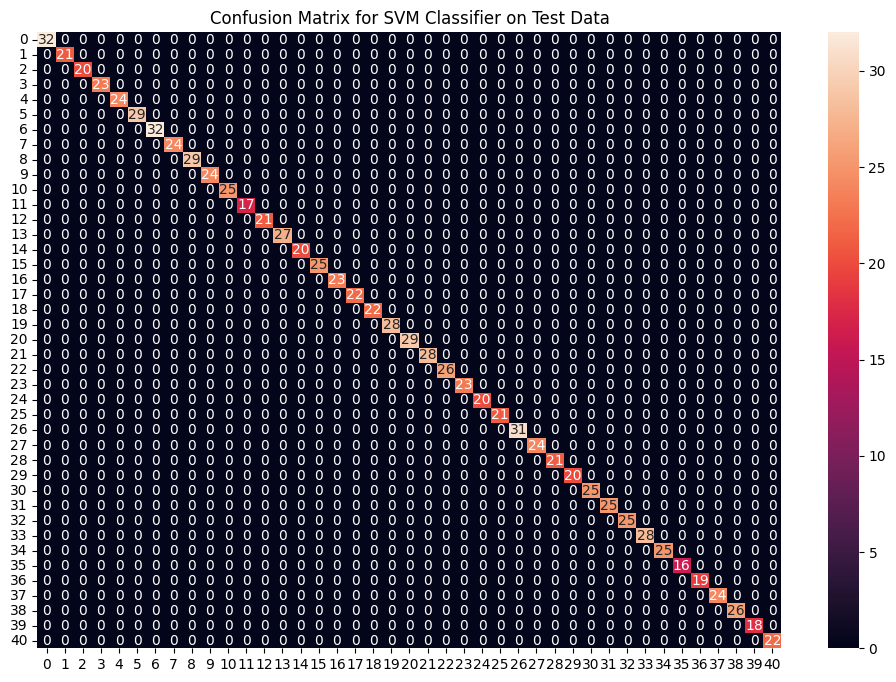

Accuracy on train data by RandomForestClassifier        :100.0
Accuracy on test data by RandomForestClassifier        :100.0


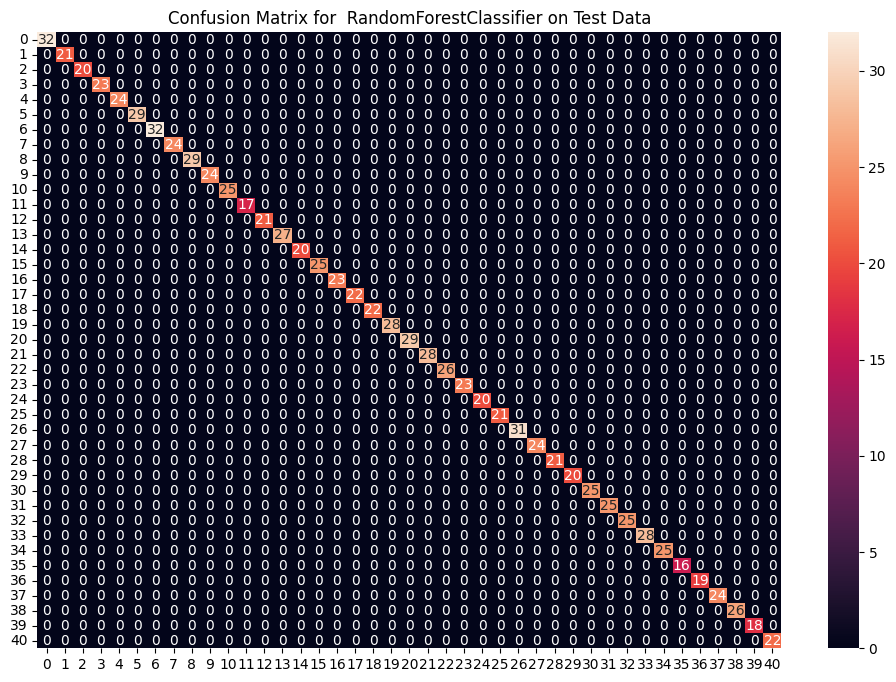

Accuracy on train data by Naive Bayes Classifier        :100.0
Accuracy on test data by Naive Bayes Classifier        :100.0


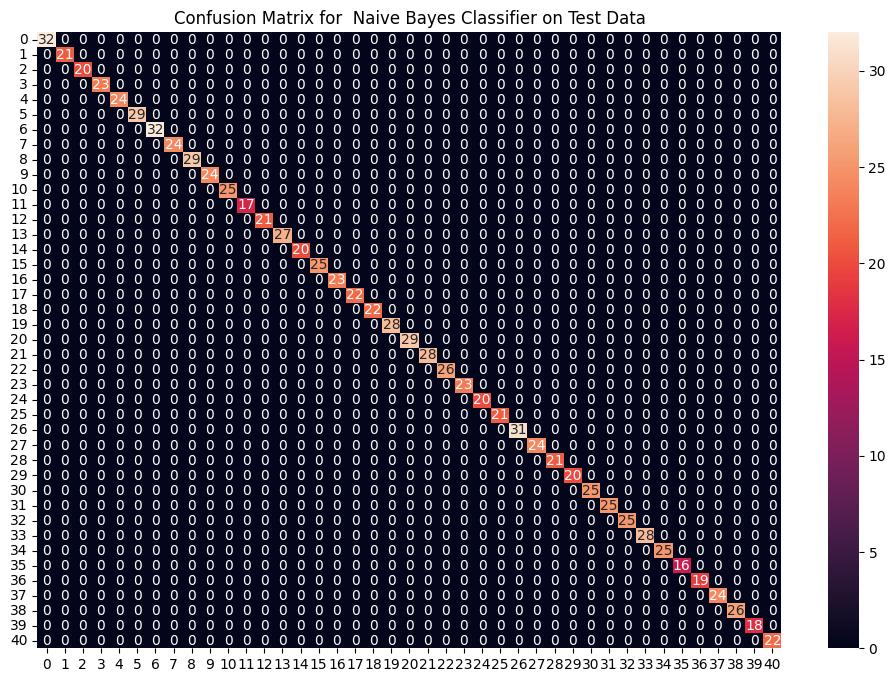

In [9]:
#Training and Testing SVM Classifier

svm_model= SVC()
svm_model.fit(x_train, y_train)
preds=svm_model.predict(x_test)

print(f"Accuracy on train data by SVM Classifier\
        :{accuracy_score(y_train, svm_model.predict(x_train))*100}")

print(f"Accuracy on test data by SVM Classifier\
        :{accuracy_score(y_test, preds)*100}")
cf_matrix= confusion_matrix(y_test, preds)
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix, annot= True)
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()

#Training and Testing Random Forest Classifier

rf_model= RandomForestClassifier(random_state=18)
rf_model.fit(x_train, y_train)
preds= rf_model.predict(x_test)

print(f"Accuracy on train data by RandomForestClassifier\
        :{accuracy_score(y_train, rf_model.predict(x_train))*100}")

print(f"Accuracy on test data by RandomForestClassifier\
        :{accuracy_score(y_test, preds)*100}")
cf_matrix= confusion_matrix(y_test, preds)
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix, annot= True)
plt.title("Confusion Matrix for  RandomForestClassifier on Test Data")
plt.show()

#Training and Testing Naive Bayes Classifier

nb_model= GaussianNB()
nb_model.fit(x_train, y_train)
preds= nb_model.predict(x_test)

print(f"Accuracy on train data by Naive Bayes Classifier\
        :{accuracy_score(y_train, nb_model.predict(x_train))*100}")

print(f"Accuracy on test data by Naive Bayes Classifier\
        :{accuracy_score(y_test, preds)*100}")
cf_matrix= confusion_matrix(y_test, preds)
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix, annot= True)
plt.title("Confusion Matrix for  Naive Bayes Classifier on Test Data")
plt.show()

Accuracy on Test dataset by the combined model: 100.0


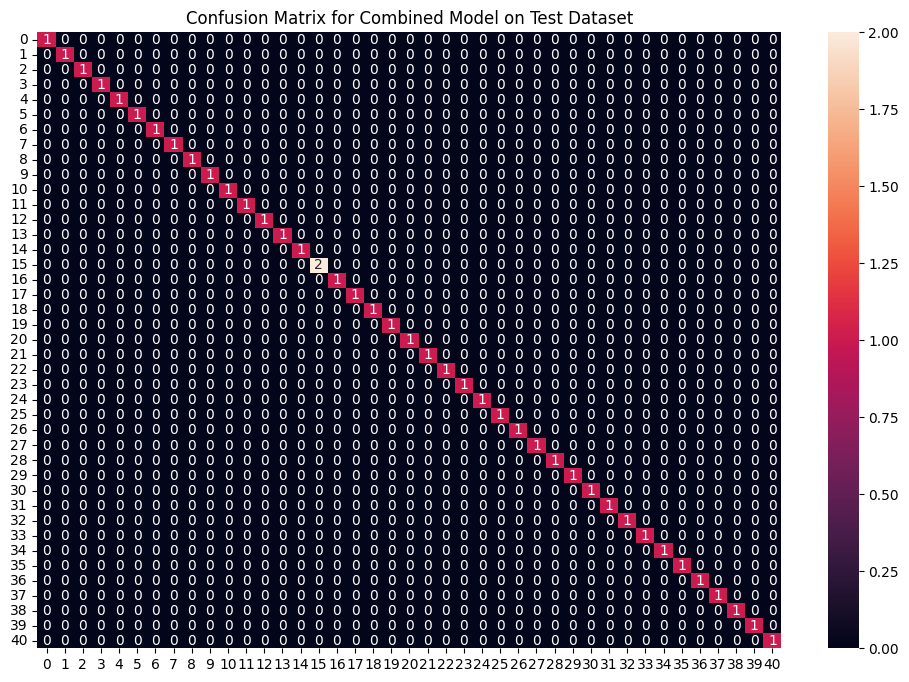

In [13]:
from statistics import mode

# Training the models on whole data
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)
final_svm_model.fit(x, y)
final_nb_model.fit(x, y)
final_rf_model.fit(x, y)
 
# Reading the test data
test_data = pd.read_csv("/kaggle/input/disease-prediction-using-machine-learning/Testing.csv").dropna(axis=1)
 
test_X = test_data.iloc[:, :-1]
test_Y = encoder.transform(test_data.iloc[:, -1])
 
# Making prediction by take mode of predictions 
# made by all the classifiers
svm_preds = final_svm_model.predict(test_X)
nb_preds = final_nb_model.predict(test_X)
rf_preds = final_rf_model.predict(test_X)

# Making prediction by taking mode of predictions 
# made by all the classifiers
combined_preds = []
for preds in zip(svm_preds, nb_preds, rf_preds):
    combined_preds.append(mode(preds))

# Calculating accuracy
accuracy = accuracy_score(test_Y, combined_preds) * 100
print(f"Accuracy on Test dataset by the combined model: {accuracy}")

# Confusion Matrix
cf_matrix = confusion_matrix(test_Y, combined_preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()


In [14]:
symptoms= x.columns.values

#Creating a symptom index dictionary to encode the input symptoms into numerical form

symptom_index= {}
for index, value in enumerate(symptoms):
    symptom= " ".join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom]= index
    

data_dict= {
    "symptom_index":symptom_index,
    "predictions_classes":encoder.classes_
}

#Defining the Functions
#Input: string containing symptoms separated by commas
#Output: Generated predictions by models

def predictDisease(symptoms):
    symptoms= symptoms.split(",")
    
    
    #creating input data for the models
    input_data= [0]*len(data_dict["symptom_index"])
    for symptom in symptoms:
        index= data_dict["symptom_index"][symptom]
        input_data[index]=1
        
    
    #Reshaping the input data and converint into suitable format for model predictions
    input_data= np.array(input_data).reshape(1, -1)
    
    # generating individual outputs
    rf_prediction = data_dict["predictions_classes"][final_rf_model.predict(input_data)[0]]
    nb_prediction = data_dict["predictions_classes"][final_nb_model.predict(input_data)[0]]
    svm_prediction = data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]]
     
    # making final prediction by taking mode of all predictions
    final_prediction = mode([rf_prediction, nb_prediction, svm_prediction])[0][0]
    predictions = {
        "rf_model_prediction": rf_prediction,
        " naive_bayes_prediction": nb_prediction,
        " svm_model_prediction": svm_prediction,
        " final_prediction":final_prediction
    }
    return predictions
 
# Testing the function
print(predictDisease("Itching,Skin Rash,Nodal Skin Eruptions"))
    

{'rf_model_prediction': 'Fungal infection', ' naive_bayes_prediction': 'Fungal infection', ' svm_model_prediction': 'Fungal infection', ' final_prediction': 'F'}


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
